# Parameter class handling for calling the stimulus classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import insilico_stimuli
from insilico_stimuli.stimuli import GaborSet, PlaidsGaborSet, DiffOfGaussians, CenterSurround
from insilico_stimuli.parameters import *

# Parameter class

There are 4 classes in the module: `Parameter`, `FiniteSelection`, `FiniteParameter`, `UniformRange`.

In [2]:
grey_level = Parameter([-1e-2, 1e-2])
print(grey_level.sample())
print(grey_level.range())

[-0.00879223]
[-0.01, 0.01]


# Finite Parameter class

In [3]:
canvas_size = [41, 41]
sizes = FiniteParameter([10, 20])
spatial_frequencies = FiniteParameter([1/20, 1/10, 1/7.5, 1/5])
contrasts = FiniteSelection([0.5, 0.75, 1.0], n=2)
orientations = FiniteParameter([val/4 for val in range(0,4)])
phases = FiniteParameter([val/4 for val in range(0,4)])
grey_levels = FiniteParameter([-0.1])
eccentricities = FiniteParameter([0.0, 0.9])
locations = UniformRange([[10, 20], [20, 30]])

In [4]:
contrasts.values

[0.5, 0.75, 1.0]

In [5]:
contrasts.sample()

[0.5, 0.75]

In [6]:
sizes.values

[10, 20]

In [7]:
# UniformRange has no attribute values
locations.values

AttributeError: 'UniformRange' object has no attribute 'values'

In [ ]:
locations.range

In [8]:
locations.sample()

[[15.890228103421169, 29.329867887475345]]

In [9]:
orientations.values

[0.0, 0.25, 0.5, 0.75]

In [10]:
# FiniteParameter has method range() but NO method sample()
print(orientations.range())
print(orientations.sample())

[0.0, 0.75]


NotImplementedError: sample method not supported for objects of type FiniteParameter.

In [11]:
print(isinstance(sizes, FiniteParameter))
print(sizes.values)

sizes.values=[10, 15, 20]
print(sizes.values)

True
[10, 20]
[10, 15, 20]


# Use the object parameters defined above to instantiate a Gabor class

In [12]:
# use these finite parameters to generate parameter combinations for the gabor
gabor_set = GaborSet(
    canvas_size=canvas_size,
    sizes=sizes,
    spatial_frequencies=spatial_frequencies,
    contrasts=contrasts,
    orientations=orientations,
    phases=phases, 
    grey_levels=grey_levels,
    eccentricities=eccentricities,
    locations=locations,
    relative_sf=False)

In [13]:
gabor_set.auto_params

{'location_width': {'name': 'location_width',
  'type': 'range',
  'bounds': [10, 20],
  'log_scale': False},
 'location_height': {'name': 'location_height',
  'type': 'range',
  'bounds': [20, 30],
  'log_scale': False},
 'size': {'name': 'size',
  'type': 'choice',
  'values': [10, 15, 20],
  'log_scale': False},
 'spatial_frequency': {'name': 'spatial_frequency',
  'type': 'choice',
  'values': [0.05, 0.1, 0.13333333333333333, 0.2],
  'log_scale': False},
 'contrast': {'name': 'contrast',
  'type': 'choice',
  'values': [0.75, 1.0],
  'log_scale': False},
 'orientation': {'name': 'orientation',
  'type': 'choice',
  'values': [0.0, 0.25, 0.5, 0.75],
  'log_scale': False},
 'phase': {'name': 'phase',
  'type': 'choice',
  'values': [0.0, 0.25, 0.5, 0.75],
  'log_scale': False},
 'gamma': {'name': 'gamma',
  'type': 'choice',
  'values': [1.0, 0.18999999999999995],
  'log_scale': True},
 'grey_level': {'name': 'grey_level', 'type': 'fixed', 'value': -0.1}}

In [14]:
print(gabor_set.locations)
print(gabor_set.locations_range)

[[14.015139103335597, 22.129276611136294]]
[[10, 20], [20, 30]]


In [15]:
# number of different parameter combinations
prod=1
for entry in gabor_set.num_params():
    prod *= entry
    
print(prod)

768


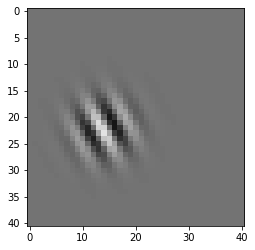

In [16]:
# show an arbitrary image
plt.imshow(gabor_set.stimulus_from_idx(500), cmap='gray', vmin=-1, vmax=1)

In [17]:
#gabor_set.find_opt_Gabor_bruteforce

# UniformRange Parameter class ("Infinite")

In [18]:
orientations = UniformRange([0, np.pi])
print(orientations.sample(n=10))
print(orientations.range)

[3.0198247528784106, 0.4616561714286523, 2.6938834907993456, 1.3065087556325952, 1.189150186674794, 1.0192998968328566, 0.8224756771707172, 0.2875785569226251, 0.6326869251573288, 2.3302704602386064]
[0, 3.141592653589793]


# Finite Selection class

In [19]:
del phases
vals = np.arange(0, 2*np.pi, np.pi/4) 
pmf = [1/len(vals)]*len(vals)
phases = FiniteSelection(vals, pmf=pmf, n=2)
print(phases.values)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


In [20]:
isinstance(phases.values, np.ndarray)

True

In [21]:
print(phases.sample())
print(phases.values)
print(phases.range)

[1.5707963267948966, 2.356194490192345]
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]
[0.0, 5.497787143782138]


In [22]:
locations = FiniteSelection([[1,1],[2,2],[3,3]], n=5)

In [23]:
locations.values

[[1, 1], [2, 2], [3, 3]]

In [24]:
locations.pmf

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [25]:
locations.sample()

[[3, 3], [2, 2], [1, 1], [1, 1], [3, 3]]

# Plaids - FiniteParameter

In [34]:
plaids_set = PlaidsGaborSet(canvas_size=[41, 41],
                            locations=FiniteParameter([[20,20]]),
                            sizes=FiniteParameter([20]),
                            spatial_frequencies=FiniteParameter([0.2]),
                            orientations=FiniteParameter([0.0]),
                            phases=FiniteParameter([0.0]),
                            contrasts_preferred=FiniteParameter([0.5, 0.75, 1.0]),
                            contrasts_overlap=FiniteParameter([0.5, 0.75, 1.0]), 
                            grey_levels=FiniteParameter([0.0]), 
                            angles=FiniteParameter([np.pi/2])
                           )

In [35]:
stim_idx = 7
print(plaids_set.params_from_idx(stim_idx))

[[20, 20], 20, 0.2, 0.0, 0.0, 1.0, 1.0, 0.75, 1.5707963267948966, 0.0]


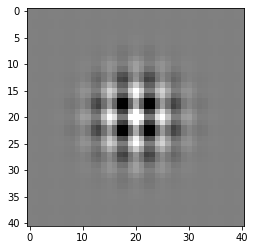

In [36]:
plt.imshow(plaids_set.stimulus_from_idx(stim_idx), cmap='gray', vmin=-1, vmax=1)

# Plaids - FiniteSelection

In [38]:
# random plaid (sampled from finite selection, without pmf)
w, h = (41, 41)
np.random.seed(0)
canvas_size         = [w, h]
locations           = FiniteSelection([[20,20]])
sizes               = FiniteSelection([20])
spatial_frequencies = FiniteSelection([3/10, 4/10, 5/10])
orientations        = FiniteSelection(list(np.arange(0, np.pi, np.pi/8)))
phases              = FiniteSelection(list(np.arange(0, 2*np.pi, np.pi/4)))
contrasts_preferred = FiniteSelection([0.5, 0.75, 1.0])
contrasts_overlap   = FiniteSelection([0.5, 0.75, 1.0], n=1)
grey_levels         = FiniteSelection([0.0])
angles              = FiniteSelection(list(np.arange(0, np.pi, np.pi/8)))

# instantiate plaids class
plaids_set2 = PlaidsGaborSet(canvas_size = [41, 41], 
                             locations=locations,
                             sizes=sizes,
                             spatial_frequencies=spatial_frequencies,
                             orientations=orientations,
                             phases=phases,
                             contrasts_preferred=contrasts_preferred,
                             contrasts_overlap=contrasts_overlap, 
                             grey_levels=grey_levels, 
                             angles=angles)

{'location': [20, 20], 'size': 20, 'spatial_frequency': 0.3, 'orientation': 1.1780972450961724, 'phase': 1.5707963267948966, 'gamma': 1.0, 'contrast_preferred': 0.5, 'contrast_overlap': 0.75, 'angle': 0.7853981633974483, 'grey_level': 0.0}


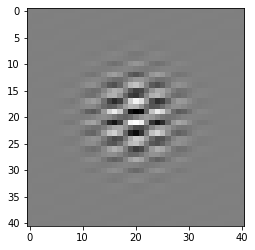

In [39]:
# plot the generated image
print(plaids_set2.params_dict_from_idx(0))
plt.imshow(plaids_set2.stimulus_from_idx(0), cmap='gray', vmin=-1, vmax=1)

# Plaids - UniformRange

In [41]:
# random plaid (sampled from parameter range, without pseudo_inverse density)
canvas_size         = [w, h]
locations           = UniformRange([[8, 34], [8, 34]])
sizes               = UniformRange([10, 30])
spatial_frequencies = UniformRange([1/80, 4/10], n=2)
orientations        = UniformRange([0, np.pi])
phases              = UniformRange([0, 2*np.pi])
contrasts_preferred = UniformRange([0.5, 1.0])
contrasts_overlap   = UniformRange([0.5, 1.0])
grey_levels         = FiniteParameter([0.0])
angles              = UniformRange([0, np.pi])

# instantiate plaids class
plaids_set3 = PlaidsGaborSet(canvas_size = [41, 41], 
                             locations=locations,
                             sizes=sizes,
                             spatial_frequencies=spatial_frequencies,
                             orientations=orientations,
                             phases=phases,
                             contrasts_preferred=contrasts_preferred,
                             contrasts_overlap=contrasts_overlap, 
                             grey_levels=grey_levels, 
                             angles=angles)

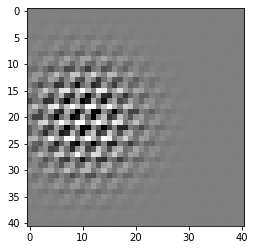

In [42]:
# plot the generated image
plt.imshow(plaids_set3.stimulus_from_idx(0), cmap='gray', vmin=-1, vmax=1)